<a href="https://colab.research.google.com/github/Bang-JW/project_1/blob/main/Section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Load

---



In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
plt.rc('font', family='NanumBarunGothic') 

In [4]:
#Dataset Upload

upload = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [5]:
#Data dataframe 형태로 불러오기

data = pd.read_csv('vgames2.csv', index_col=0)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# Data PreProcessing

---



In [6]:
# data type 확인

data.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [7]:
# Data에서 결측치 값 개수 확인

data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
# 총 데이터 개수에 비해 결측치의 개수가 적기 때문에 결측치를 제거

data = data.dropna()
data = data.reset_index(drop=True)

In [9]:
# Year data preprocessing

def year_preprocessing(column_name):
    data[column_name] = data[column_name].astype('int64')
    
    for i in range(0,len(data)):
        if data[column_name].loc[i] < 22:  # 22이하의 데이터는 2000을 더해 2000년도로 만듦
            data[column_name].loc[i] = data[column_name].loc[i] + 2000
            
        elif data[column_name].loc[i] > 22 and data[column_name].loc[i] < 100: # 22보다 크고 100보다 작은 데이터는 1900년대로 만듦
            data[column_name].loc[i] = data[column_name].loc[i] + 1900 

In [10]:
year_preprocessing('Year')

**0.00 형식의 데이터는 뒤에 'K'를 붙여 단위를 통일**

In [11]:
# column_name : 전처리하려는 00_Sales 넣어줍니다.

def sales_unit_adding(column_name):
    for i in range(0,len(data)):
        data[column_name][i] = re.sub('[0-9].[0-9][0-9]$', data[column_name][i]+'K', data[column_name][i]) #0.00과 같은 형식의 str에 K를 추가한다.
        
def sales_unit_conversion(column_name):
    data[column_name] = (data[column_name].replace(r'[KM]+$', '', regex=True).astype(float) *     # K 혹은 M이 있으면 ''으로 바꿔준다.
                                    data[column_name].str.extract(r'[\d\.]+([KM]+)', expand=False) 
                                    .fillna(1)
                                    .replace(['K','M'], [10**3, 10**6]).astype(int))    # K, M 을 10^3, 10^6으로 바꿔준후 곱한다.

In [12]:
# sales_column 변수에 Sales와 관련된 Column name이 담긴 list 생성 

sales_column = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

In [13]:
for value in sales_column:
    sales_unit_adding(value)

In [14]:
for value in sales_column:
    sales_unit_conversion(value)

In [15]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0


# Q1. 지역에 따라 선호하는 게임 장르가 다를까?


---



In [16]:
# 각각의 지역별로 출고량을 내림차순으로 정리한 dataframe 생성

sort_na = data.loc[:,'Genre':'Other_Sales'].groupby('Genre').sum().sort_values(['NA_Sales'],ascending=False)
sort_eu = data.loc[:,'Genre':'Other_Sales'].groupby('Genre').sum().sort_values(['EU_Sales'],ascending=False)
sort_jp = data.loc[:,'Genre':'Other_Sales'].groupby('Genre').sum().sort_values(['JP_Sales'],ascending=False)
sort_other = data.loc[:,'Genre':'Other_Sales'].groupby('Genre').sum().sort_values(['Other_Sales'],ascending=False)

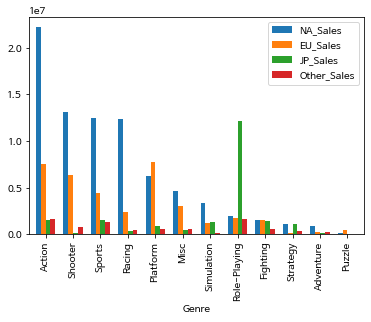

In [17]:
# Graph 1 : 한 눈에 좋음 그러나 크기 순서대로 보기가 어려움

sort_na.plot.bar(width=0.7)

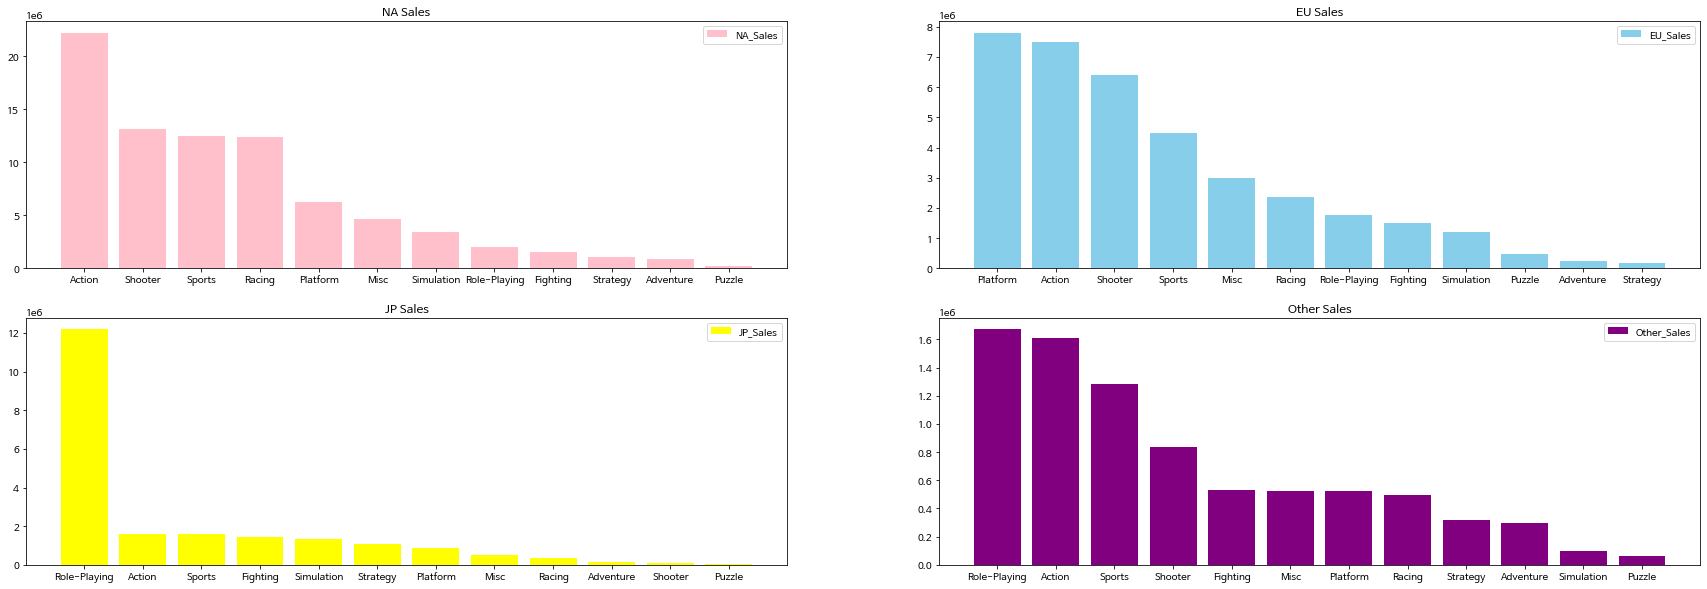

In [18]:
# Graph 2 : 각각의 데이터를 따로 그래프로 나타냄

plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.title('NA Sales')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) 
plt.bar(sort_na.index, sort_na['NA_Sales'],label = 'NA_Sales', color='pink')
plt.legend()

plt.subplot(2,2,2)
plt.title('EU Sales')
plt.bar(sort_eu.index, sort_eu['EU_Sales'],label = 'EU_Sales', color='skyblue')
plt.legend()

plt.subplot(2,2,3)
plt.title('JP Sales')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) 
plt.bar(sort_jp.index, sort_jp['JP_Sales'],label = 'JP_Sales', color='yellow')
plt.legend()

plt.subplot(2,2,4)
plt.title('Other Sales')
plt.bar(sort_other.index, sort_other['Other_Sales'],label = 'Other_Sales',color='purple')
plt.legend()

**결론**

질문에 대한 답을 시각화를 통해 알 수 있다.

**지역별 결과**

> - **북미**는 Action - Shooter - Sports
- **유럽**은 Platform - Action - Shooter
- **일본**은 Role-Playing - Action - Sports (Role playing 게임이 압도적으로 많은 것을 확인 할 수 있다.)
- **그 외 지역**은 첫 최상위 3개는 비슷하지만 그 밑으로는 다른 형태를 보이고 있다.




 **즉, 지역에 따라 선호하는 게임 장르가 다르다.**

# Q2. 연도별 게임의 트렌드가 있을까?

---



In [19]:
# 전체 출고량 Column 생성 :  모든 지역의 출고량을 더한 값

data['Sales_Sum'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']

In [20]:
sort_by_year = data.groupby(['Year', 'Genre'])['Sales_Sum'].sum().reset_index()
sort_by_year

,Year,Genre,Sales_Sum
0,1980,Action,340.0
1,1980,Fighting,770.0
2,1980,Misc,2700.0
3,1980,Shooter,3074.0
4,1981,Action,123980.7
...,...,...,...
383,2016,Sports,294250.1
384,2016,Strategy,320.2
385,2017,Action,10.0
386,2017,Role-Playing,40.0


In [21]:
# 그룹별로 최대값을 찾는 조건을 ['Sales_Sum'] 에 적용

condition = sort_by_year['Sales_Sum'] == sort_by_year.groupby(['Year'])['Sales_Sum'].transform(max)

In [22]:
sort_by_year = sort_by_year[condition]

In [23]:
sort_by_year = sort_by_year.reset_index(drop=True)
sort_by_year

,Year,Genre,Sales_Sum
0,1980,Shooter,3074.0
1,1981,Action,123980.7
2,1982,Puzzle,9940.1
3,1983,Platform,6230.7
4,1984,Shooter,231100.0
5,1985,Platform,702610.1
6,1986,Action,13740.0
7,1987,Fighting,5420.0
8,1988,Platform,216840.7
9,1989,Platform,119960.7


In [24]:
# 어떤 장르가 최대 출고량을 기록한 횟수 

genre_count = sort_by_year.groupby('Genre').count()
genre_count = genre_count.drop('Year', axis = 1)
genre_count.sort_values('Sales_Sum', ascending = False)

,Sales_Sum
Genre,
Action,8
Platform,8
Shooter,6
Fighting,3
Racing,3
Role-Playing,3
Simulation,3
Sports,2
Adventure,1


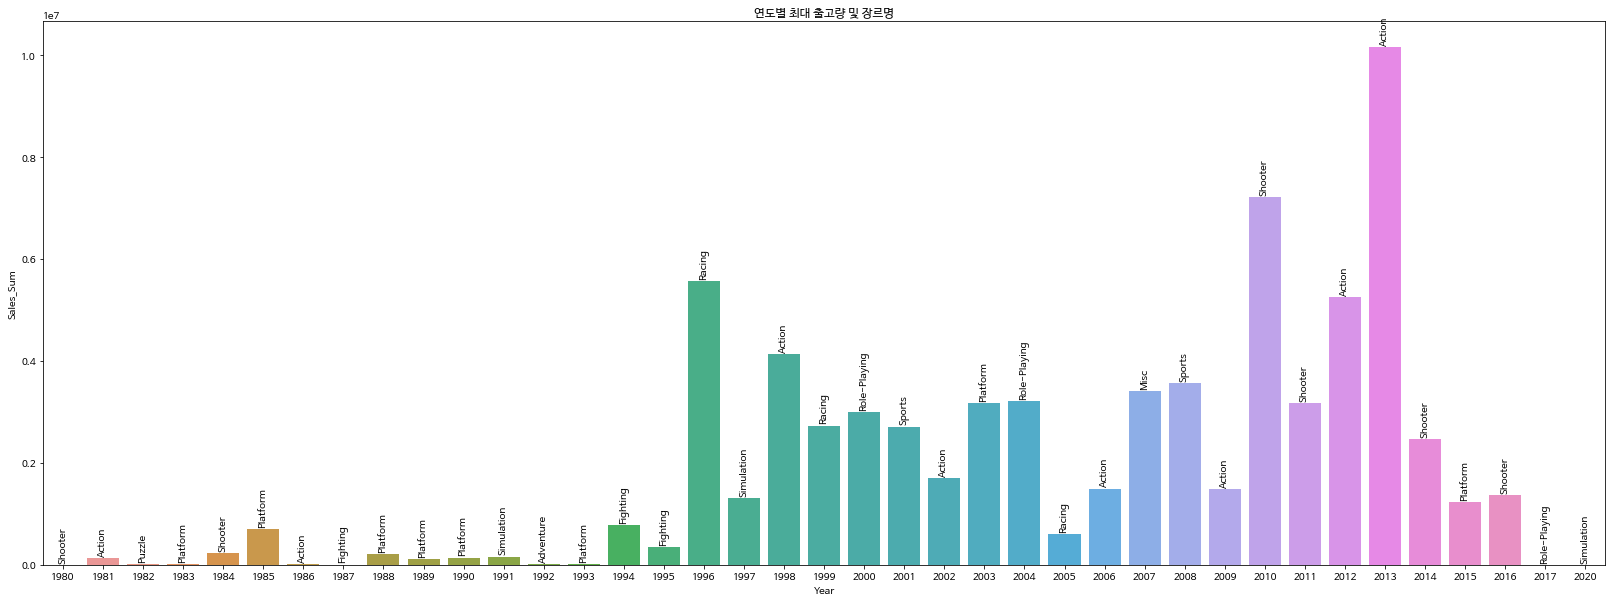

In [25]:
plt.figure(figsize=(28,10))
plt.title("연도별 최대 출고량 및 장르명")
ax = sns.barplot(x='Year', y='Sales_Sum', data=sort_by_year)

for i in range(len(sort_by_year)):
  ax.text(x = i, y=sort_by_year['Sales_Sum'][i]+10**5, s = sort_by_year['Genre'][i], rotation = 90, ha = 'center')

**결론**


---
* 매년 트렌드를 형성한다기 보다는 10년단위로 트렌드가 있다고 볼 수 있다.
*   80년대에는 Platform 게임 2000년대에는 Action Shooter 게임
*   90년대에는 뚜렷한 경향성을 보이지 않는다.






# Q3. 출고량 높은 게임에 대한 분석 및 시각화 프로세스

---




In [26]:
sort_by_total_sales = data.sort_values('Sales_Sum', ascending=False)
sort_by_total_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
10695,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5310.0,60.0,1380.0,9636750.0
12337,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000.0,1980.0,80.0,780.0,7032840.0
568,Mario Kart 64,N64,1996,Racing,Nintendo,5550000.0,1940.0,2230.0,150.0,5554320.0
1930,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.0,1890.0,1450.0,160.0,4103500.0
1780,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4340.0,2650.0,3150000.0,350.0,3157340.0
...,...,...,...,...,...,...,...,...,...,...
14820,Wizardry VI: Bane of the Cosmic Forge,SNES,1995,Role-Playing,ASCII Entertainment,0.0,0.0,0.1,0.0,0.1
7372,Digimon Story: Super Xros Wars Blue/Red,DS,2011,Role-Playing,Namco Bandai Games,0.0,0.0,0.1,0.0,0.1
15681,Fate/hollow ataraxia,PSV,2014,Adventure,Type-Moon,0.0,0.0,0.1,0.0,0.1
4151,Tales of Innocence R,PSV,2012,Role-Playing,Namco Bandai Games,0.0,0.0,0.1,0.0,0.1


**위와 같이 출고량 합계에 대해 높은 순으로 정리하면 북미의 점유량이 많게 되어 유의미한 결과라고 보기 어렵다고 판단하여, 지역별로 나눠서 진행**

In [27]:
sort_by_na_sales = data.sort_values('NA_Sales', ascending=False).reset_index(drop=True)
sort_by_eu_sales = data.sort_values('EU_Sales', ascending=False).reset_index(drop=True)
sort_by_jp_sales = data.sort_values('JP_Sales', ascending=False).reset_index(drop=True)
sort_by_other_sales = data.sort_values('Other_Sales', ascending=False).reset_index(drop=True)

In [28]:
sort_by_jp_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4340.0,2650.0,3150000.0,350.0,3157340.0
1,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5890.0,5040.0,3120000.0,590.0,3131520.0
2,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1620.0,770.0,2780000.0,140.0,2782530.0
3,Mario Tennis,N64,2000,Sports,Nintendo,780.0,0.4,1060000.0,70.0,1060850.4
4,Densha De Go!,PS,1997,Simulation,Taito,0.0,0.0,1020000.0,70.0,1020070.0
...,...,...,...,...,...,...,...,...,...,...
16236,WipeOut 3 The Game,3DS,2012,Action,Activision,180.0,0.0,0.0,10.0,190.0
16237,Black Sigil: Blade of the Exiled,DS,2009,Role-Playing,Graffiti,50.0,0.0,0.0,0.0,50.0
16238,Go Diego Go!: Safari Rescue,PS2,2008,Action,Take-Two Interactive,20.0,20.0,0.0,10.0,50.0
16239,Star Wars: Clone Wars,XB,2003,Shooter,LucasArts,0.1,30.0,0.0,0.0,30.1


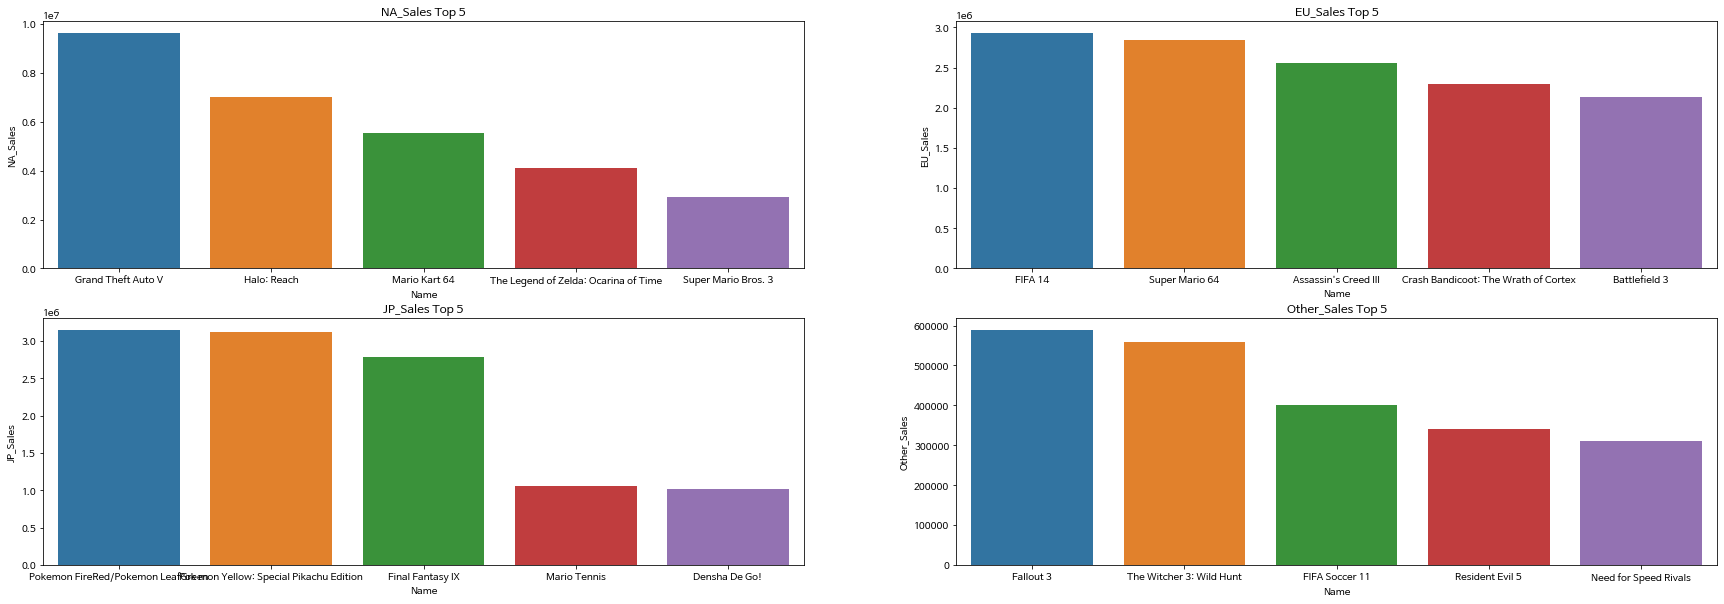

In [29]:
# 지역별 Top5 게임

plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.title("NA_Sales Top 5")
sns.barplot(sort_by_na_sales.head(5)['Name'], sort_by_na_sales.head(5)['NA_Sales'])

plt.subplot(2,2,2)
plt.title("EU_Sales Top 5")
sns.barplot(sort_by_eu_sales.head(5)['Name'], sort_by_eu_sales.head(5)['EU_Sales'])

plt.subplot(2,2,3)
plt.title("JP_Sales Top 5")
sns.barplot(sort_by_jp_sales.head(5)['Name'], sort_by_jp_sales.head(5)['JP_Sales'])

plt.subplot(2,2,4)
plt.title("Other_Sales Top 5")
sns.barplot(sort_by_other_sales.head(5)['Name'], sort_by_other_sales.head(5)['Other_Sales'])

In [30]:
# 각 지역에서 출고량 기준 top10 데이터만 합친 DataFrame 생성

top10_data = pd.concat([sort_by_na_sales.head(10), sort_by_eu_sales.head(10), sort_by_jp_sales.head(10), sort_by_other_sales.head(10)] )
top10_data = top10_data.reset_index(drop=True)
top10_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5310.0,60.0,1380.0,9636750.0
1,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000.0,1980.0,80.0,780.0,7032840.0
2,Mario Kart 64,N64,1996,Racing,Nintendo,5550000.0,1940.0,2230.0,150.0,5554320.0
3,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.0,1890.0,1450.0,160.0,4103500.0
4,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000.0,1250.0,830.0,0.2,2932080.2
5,Tony Hawk's Pro Skater 3,PS2,2001,Sports,Activision,2660000.0,1290.0,10.0,460.0,2661760.0
6,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,2570000.0,1570.0,440.0,210.0,2572220.0
7,Guitar Hero II,X360,2007,Misc,Activision,2010000.0,20.0,0.0,170.0,2010190.0
8,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,1780000.0,1420.0,50.0,380.0,1781850.0
9,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,1610000.0,270.0,50.0,180.0,1610500.0


In [31]:
top10_genre = top10_data.loc[:,'Genre':'Other_Sales'].groupby('Genre').sum()
top10_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,13738510.0,2569380.8,471810.0,612930.0
Fighting,2180.0,1350120.0,770060.0,180.0
Misc,2010820.0,660.0,0.0,220170.0
Platform,2938980.0,5141250.0,2980.0,1050.2
Racing,8120330.0,4250.0,2720.0,310360.0
Role-Playing,16700.1,1248533.2,10692150.0,1151660.0
Shooter,8819960.0,4454700.0,260.0,542320.0
Simulation,450.0,960000.0,1020020.0,70.2
Sports,4273630.0,2931562.8,1060090.0,671170.0


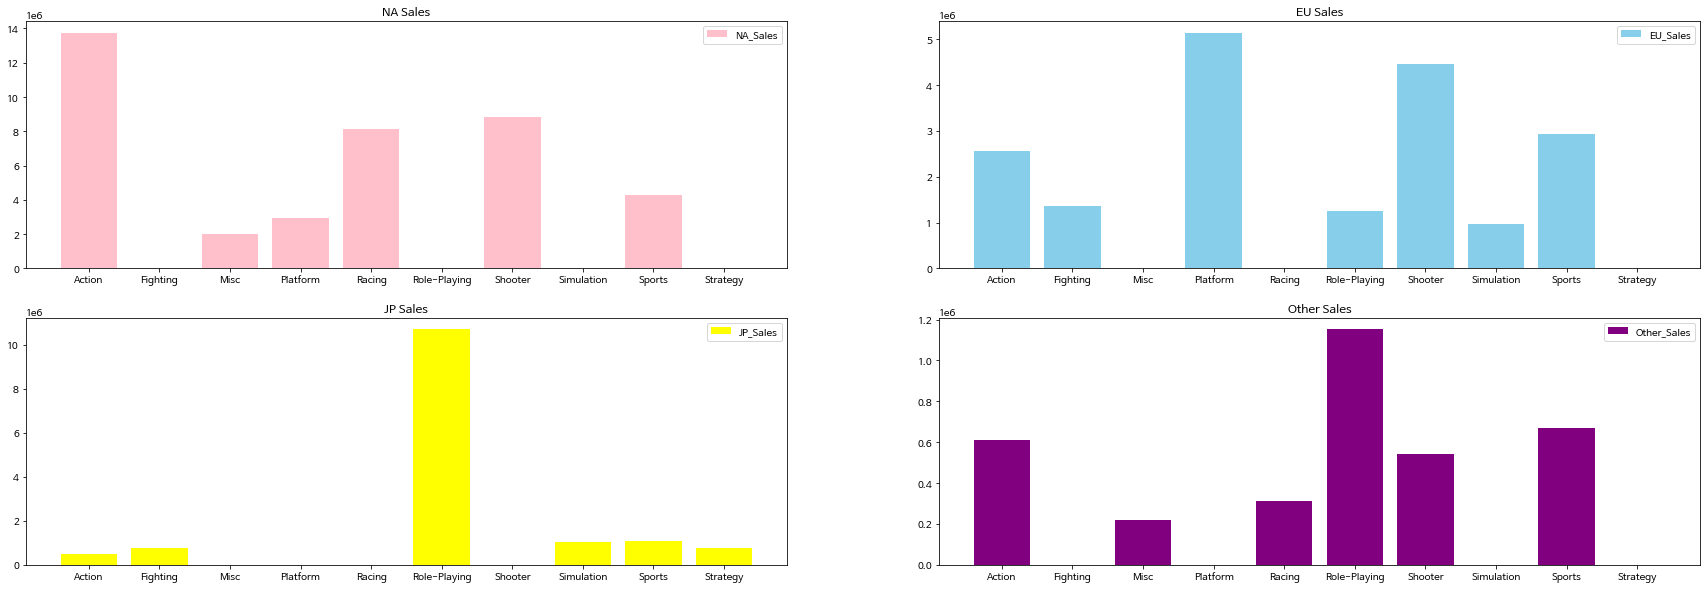

In [32]:
#각 지역 장르별 Top10 게임의 출고량

plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.title('NA Sales')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) 
plt.bar(top10_genre.index, top10_genre['NA_Sales'],label = 'NA_Sales', color='pink')
plt.legend()

plt.subplot(2,2,2)
plt.title('EU Sales')
plt.bar(top10_genre.index, top10_genre['EU_Sales'],label = 'EU_Sales', color='skyblue')
plt.legend()

plt.subplot(2,2,3)
plt.title('JP Sales')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) 
plt.bar(top10_genre.index, top10_genre['JP_Sales'],label = 'JP_Sales', color='yellow')
plt.legend()

plt.subplot(2,2,4)
plt.title('Other Sales')
plt.bar(top10_genre.index, top10_genre['Other_Sales'],label = 'Other_Sales',color='purple')
plt.legend()

In [33]:
#플랫폼별 출고량 확인

top10_platform = top10_data.loc[:,'Platform':'Other_Sales'].groupby('Platform').sum()
top10_platform = top10_platform.drop('Year',axis=1)
top10_platform 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
DS,0.0,0.0,930000.0,0.0
GB,5890.0,5040.0,3120000.0,590.0
GBA,2934340.0,3900.0,3150830.0,350.2
N64,9657690.0,2853830.4,1065590.0,610.0
PC,10.0,790000.0,0.0,90.0
PS,2575450.1,1353650.0,5730500.0,940.0
PS2,2664110.0,2291930.0,250.0,491280.0
PS3,1617580.0,3801701.2,2240.0,1211840.0
PS4,1780960.0,1422.0,260.0,560380.0


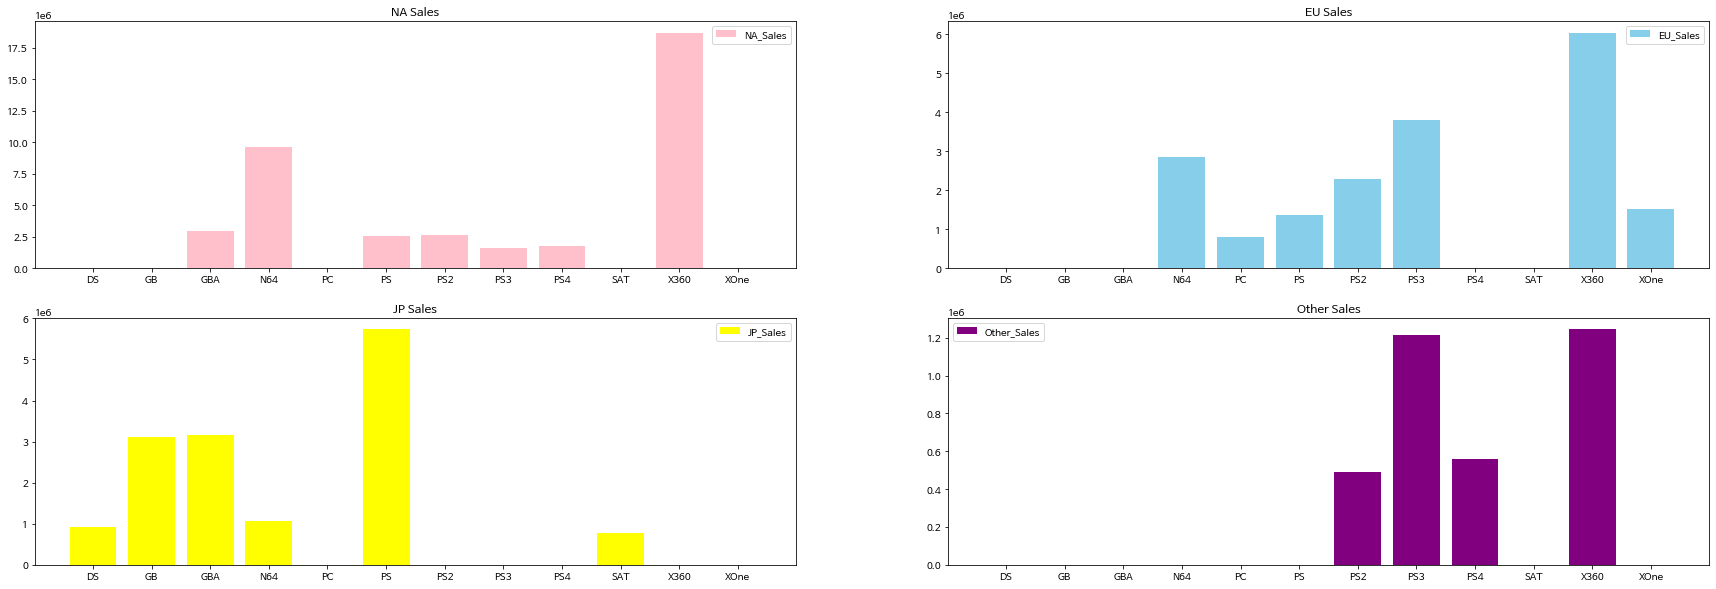

In [34]:
plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.title('NA Sales')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) 
plt.bar(top10_platform.index, top10_platform['NA_Sales'],label = 'NA_Sales', color='pink')
plt.legend()

plt.subplot(2,2,2)
plt.title('EU Sales')
plt.bar(top10_platform.index, top10_platform['EU_Sales'],label = 'EU_Sales', color='skyblue')
plt.legend()

plt.subplot(2,2,3)
plt.title('JP Sales')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) 
plt.bar(top10_platform.index, top10_platform['JP_Sales'],label = 'JP_Sales', color='yellow')
plt.legend()

plt.subplot(2,2,4)
plt.title('Other Sales')
plt.bar(top10_platform.index, top10_platform['Other_Sales'],label = 'Other_Sales',color='purple')
plt.legend()

최종결론 : 지역별로 선호 장르와 Platform 이 다르기 때문에 지역별로 다음 분기 게임 출시는 지역별로 다르게 해야한다.



*   북미 : Xbox, Action 게임
*   유럽 : Xbox, Platform 게임
*   일본 : PlayStation, Role-Playing 게임
*   기타지역 : PlayStation, Role-Playing 게임







